In [4]:
from __future__ import absolute_import, division, print_function

import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras import layers

print(tf.__version__)
print(tf.keras.__version__)

ImportError: No module named 'pandas'

In [5]:
dataset_path = "ik.csv"

In [82]:
column_names = ["translation_x", "translation_y", "rot_z", "theta1", "theta2", "theta3"]
raw_dataset = pd.read_csv(dataset_path,
                          names=column_names,
                          na_values="?",
                          sep=",",
                          skipinitialspace=True)

dataset = raw_dataset.copy()
print(dataset.tail())

print(dataset.isna().sum())
dataset = dataset.dropna()

      translation_x  translation_y     rot_z      theta1      theta2  \
9995      -4.629043      -1.335413  2.509197    1.735591 -132.718335   
9996      -4.431661     -17.961425  1.164591  -81.048058 -105.284763   
9997       0.904363     -17.198005  3.073983  -65.064058   16.865170   
9998      -2.458653      -1.255767  1.833824  154.196350 -130.321383   
9999       5.899068      -9.281253  1.030733 -129.972125  174.071725   

          theta3  
9995  -85.250850  
9996  119.606645  
9997 -127.927388  
9998 -128.945334  
9999 -103.156238  
translation_x    0
translation_y    0
rot_z            0
theta1           0
theta2           0
theta3           0
dtype: int64


In [83]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
train_labels = train_dataset[["theta1", "theta2", "theta3"]]
test_dataset = dataset.drop(train_dataset.index)
test_labels = test_dataset[["theta1", "theta2", "theta3"]]

In [84]:
model = keras.Sequential([
    layers.Dense(100, activation=tf.nn.tanh, input_shape=[len(train_dataset.keys())]),
    layers.Dense(3, activation=tf.keras.activations.linear)
])

In [85]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
              loss=tf.keras.losses.mean_squared_error,
              metrics=['accuracy', 'mean_squared_error'])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 100)               700       
_________________________________________________________________
dense_9 (Dense)              (None, 3)                 303       
Total params: 1,003
Trainable params: 1,003
Non-trainable params: 0
_________________________________________________________________
None


In [86]:
class PrintDot(keras.callbacks.Callback):
    # noinspection PyMethodOverriding
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

In [87]:
history = model.fit(train_dataset,
                    train_labels,
                    epochs=1000,
                    validation_split=0.2,
                    verbose=0,
                    callbacks=[PrintDot()])
print('')


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [88]:
history_df = pd.DataFrame(history.history)
history_df['epoch'] = history.epoch
print(history_df.tail())

          acc      loss  mean_squared_error   val_acc   val_loss  \
995  0.985781  7.726316            7.726318  0.987500   6.379226   
996  0.987656  7.808483            7.808481  0.987500   6.819171   
997  0.987969  7.549473            7.549472  0.988750  10.726347   
998  0.988594  7.672552            7.672552  0.989375   6.015703   
999  0.990000  6.291154            6.291155  0.988750   5.426029   

     val_mean_squared_error  epoch  
995                6.379225    995  
996                6.819172    996  
997               10.726349    997  
998                6.015703    998  
999                5.426030    999  


In [89]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error')
    plt.plot(hist['epoch'], hist['mean_squared_error'],
             label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_squared_error'],
             label='Val Error')
    plt.semilogy()
    plt.legend()
    plt.show()

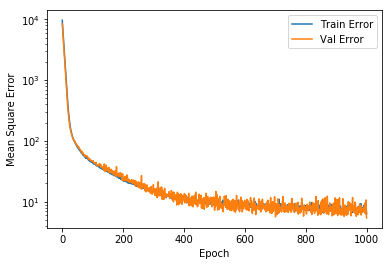

In [90]:
plot_history(history)

In [91]:
loss, accuracy, mse = model.evaluate(test_dataset, test_labels, verbose=0)
print("Test dataset Accuracy: {} Mean Square Error: {}".format(accuracy, mse))

Test dataset Accuracy: 0.9909999966621399 Mean Square Error: 5.848544597625732
